# Term Deposit Subscription Prediction
A Portuguese banking institution has collected data about their clients and they now want to use this data to design their marketing campaigns for maximum profit. The product being sold is a term deposit (Fixed Deposit).The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [203]:
#import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [204]:
bank = pd.read_csv('train.csv')

In [205]:
bank.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [206]:
#checking if missing values are present
bank.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No missing values, data is clean

In [207]:
bank.shape

(32978, 22)

In [208]:
bank.describe()

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000
mean,20620.844533,40.042392,258.808145,2.563376,961.752471,0.174480,0.079562,93.574961,-40.508163,3.618474,5166.942198
std,11878.692749,10.466038,259.565427,2.770355,188.683048,0.497501,1.571342,0.579191,4.633056,1.735421,72.341606
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10346.250000,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20649.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30887.750000,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41187.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Concise summary of the dataset

## Analysing categorical features

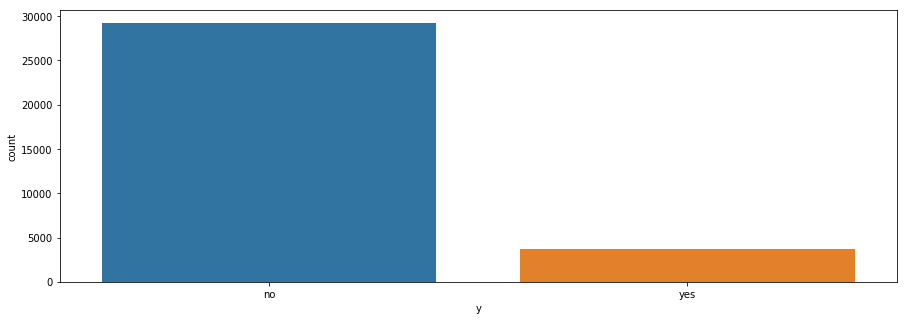

In [209]:
plt.rcParams['figure.figsize'] = [15,5]
sns.countplot(x = 'y',data=bank)

As expected, majority of people do not subscribe.

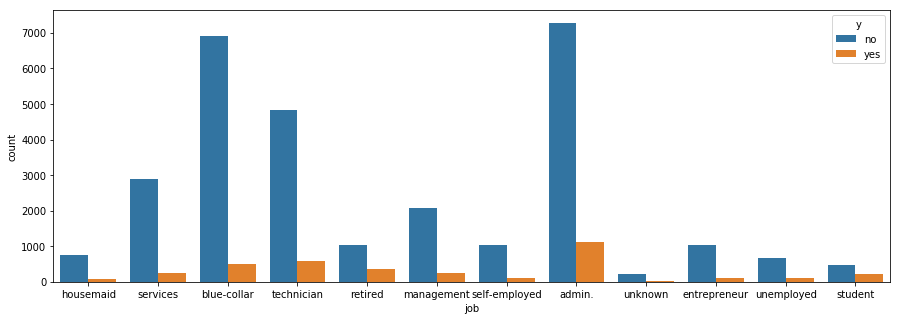

In [210]:
sns.countplot(x = 'job',data=bank, hue='y')

Most of the people have blue-collar and admin jobs.

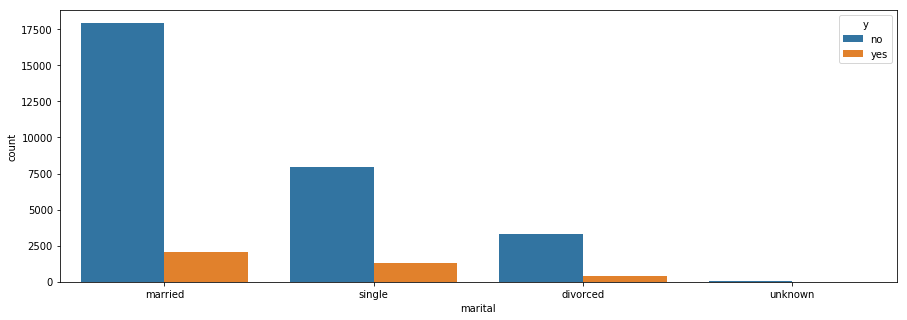

In [211]:
sns.countplot(x = 'marital',data=bank,hue='y')


Most of the people are married, but the percentage of singles subscribing is more.

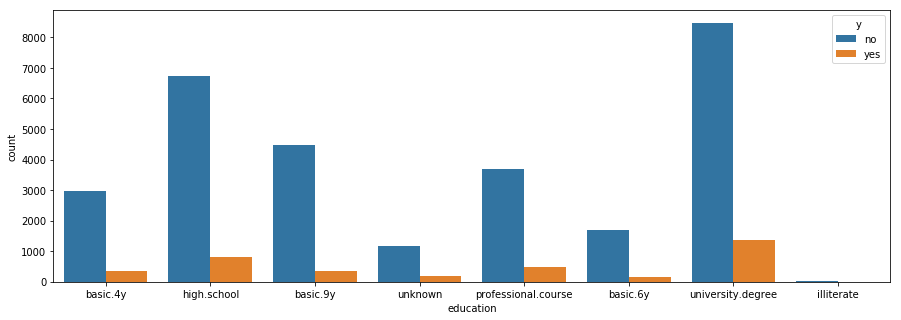

In [212]:
sns.countplot(x = 'education',data=bank,hue='y')


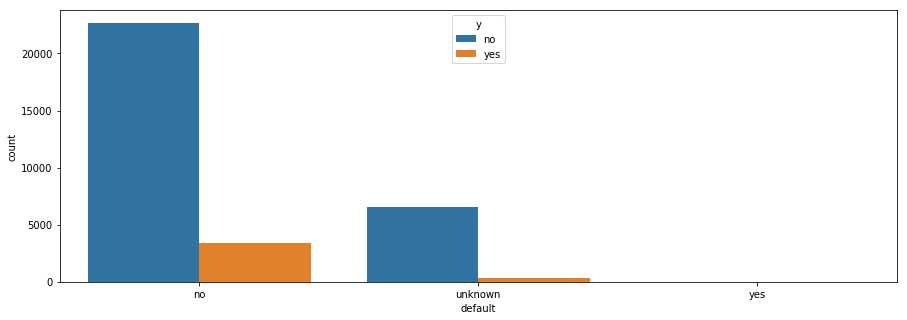

In [213]:
sns.countplot(x = 'default',data=bank,hue='y')


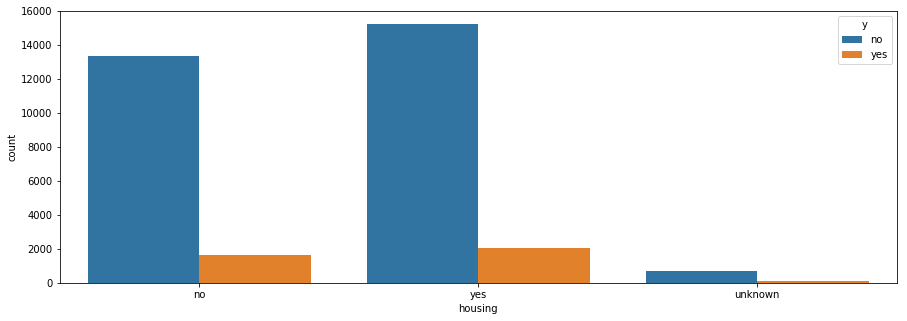

In [214]:
sns.countplot(x = 'housing',data=bank,hue='y')


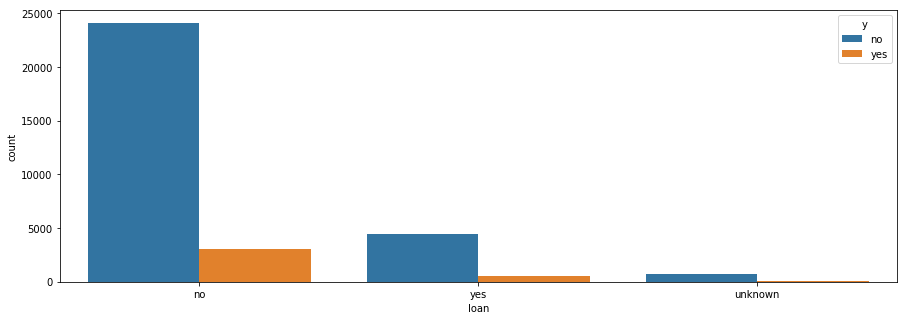

In [215]:
sns.countplot(x = 'loan',data=bank,hue='y')


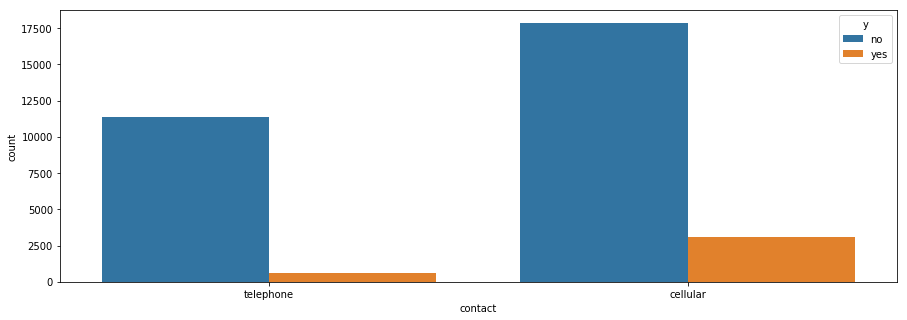

In [216]:
sns.countplot(x = 'contact',data=bank,hue='y')


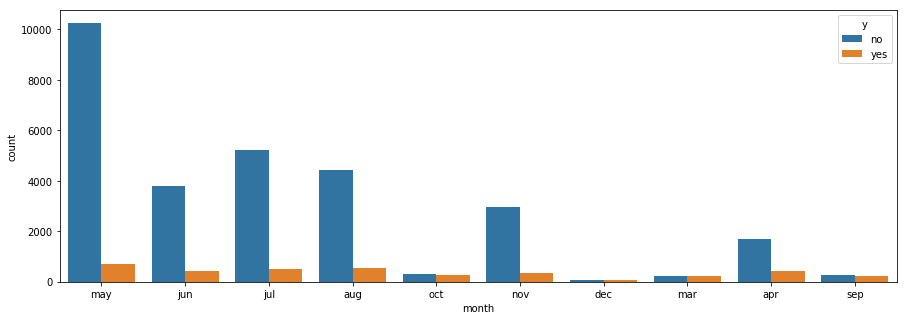

In [217]:
sns.countplot(x = 'month',data=bank,hue='y')


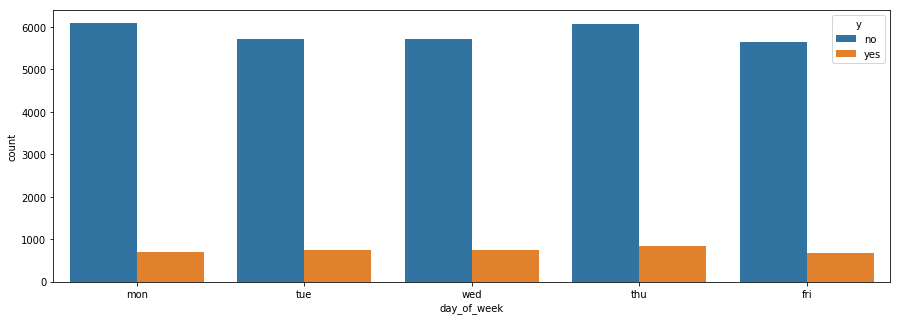

In [218]:
sns.countplot(x = 'day_of_week',data=bank,hue='y')


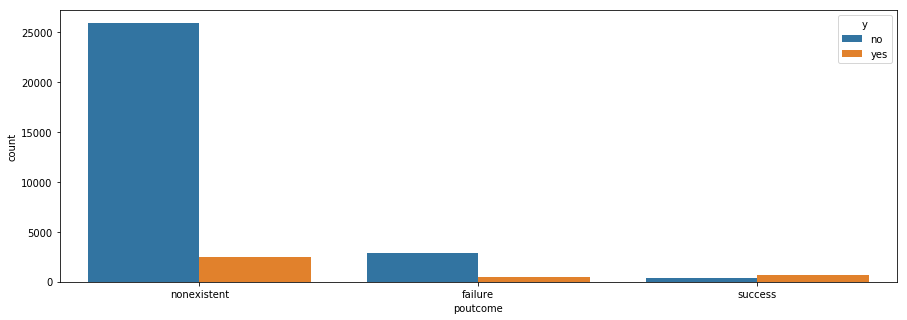

In [219]:
sns.countplot(x = 'poutcome',data=bank,hue='y')


## Numerical Features

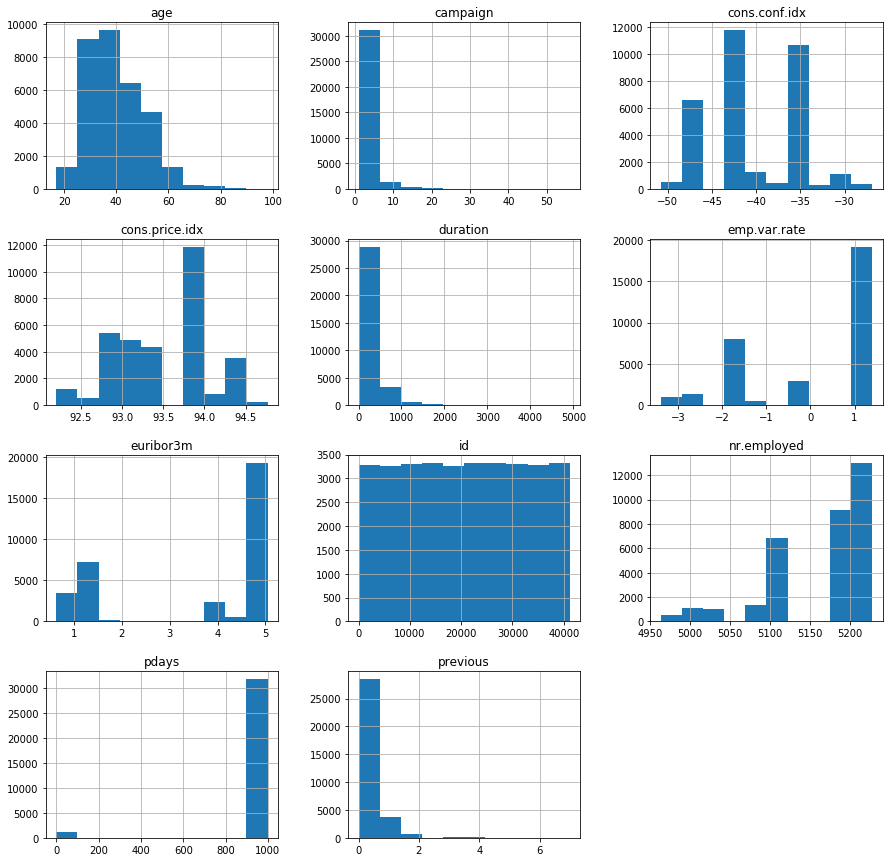

In [220]:
bank.hist(figsize=(15,15))
#Clear the text "residue"
plt.show()

1. Age is heavily distributed between 20 and 60 years.
2. Duration of calls is less than 500 sec for most of the targeted audience.


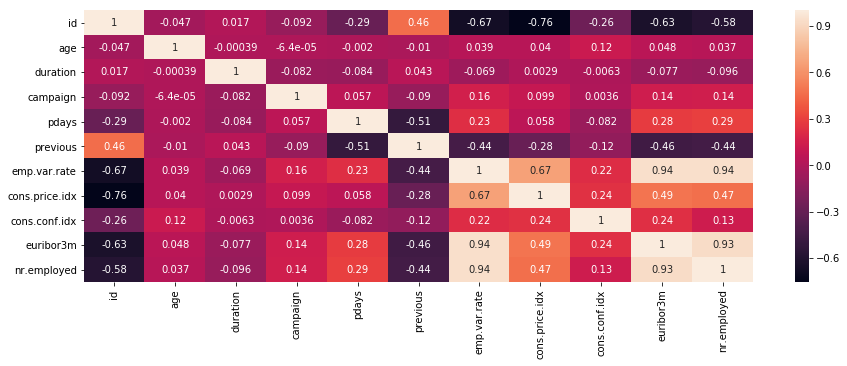

In [241]:
sns.heatmap(bank.corr(method='spearman'),annot=True)

# Suggestions

1. Target customers who were already part of the previous campaigns.
2. Old people showed more tendency towards subscription.
3. Longer duration calls will help in convincing the customers.

#### Standardizing the numerical column data

In [222]:
idx_numeric=[1,11,12,13,14,16,17,18,19]
scaler = MinMaxScaler()
bank[bank.columns[idx_numeric]] = scaler.fit_transform(bank[bank.columns[idx_numeric]])

C:\Users\APARNA\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### Setting the target variable

In [223]:
y = bank.y

#### Using get_dummies to encode categorical data

In [224]:
X = pd.get_dummies(bank, prefix_sep='_')
X.head()

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,...,0,1,0,0,0,0,1,0,1,0
1,1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,...,0,1,0,0,0,0,1,0,1,0
2,2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,...,0,1,0,0,0,0,1,0,1,0
3,4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,...,0,1,0,0,0,0,1,0,1,0
4,5,0.345679,0.040260,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,...,0,1,0,0,0,0,1,0,1,0


In [225]:
bank_ft = ['age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

In [226]:
X = X[bank_ft]
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,0.345679,0.040260,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [227]:
X.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,...,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000
mean,0.284474,0.052625,0.028425,0.962715,0.024926,0.724909,0.535449,0.430621,0.676598,5166.942198,...,0.017587,0.014009,0.191795,0.205834,0.209776,0.196434,0.196161,0.103554,0.862484,0.033962
std,0.129210,0.052779,0.050370,0.188872,0.071072,0.327363,0.225717,0.193852,0.393430,72.341606,...,0.131448,0.117531,0.393718,0.404316,0.407155,0.397307,0.397098,0.304686,0.344396,0.181134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.020943,0.000000,1.000000,0.000000,0.333333,0.340608,0.338912,0.160961,5099.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.259259,0.036600,0.018182,1.000000,0.000000,0.937500,0.603274,0.376569,0.957379,5191.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.370370,0.065067,0.036364,1.000000,0.000000,1.000000,0.698753,0.602510,0.980957,5228.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5228.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Splitting the dataset

In [228]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

### Logistic Regression Model

In [229]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000,random_state=1)
model.fit(x_train, y_train)

C:\Users\APARNA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [230]:
prediction=model.predict(x_test)

In [231]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9034263189812007

In [232]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95      5868
         yes       0.72      0.20      0.32       728

   micro avg       0.90      0.90      0.90      6596
   macro avg       0.82      0.60      0.63      6596
weighted avg       0.89      0.90      0.88      6596



### Random Forest Model

In [233]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [234]:
predict = rfc.predict(x_test)

In [235]:
accuracy_score(y_test, predict)

0.9123711340206185

In [236]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

          no       0.94      0.97      0.95      5868
         yes       0.64      0.46      0.54       728

   micro avg       0.91      0.91      0.91      6596
   macro avg       0.79      0.71      0.74      6596
weighted avg       0.90      0.91      0.91      6596



### Support Vector Machine

In [237]:
from sklearn.svm import SVC
svm = SVC(kernel="linear",random_state=1)
svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [238]:
y_svm = svm.predict(x_test)

In [239]:
accuracy_score(y_test, y_svm)

0.8994845360824743

In [240]:
print(classification_report(y_test,y_svm))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95      5868
         yes       0.65      0.20      0.30       728

   micro avg       0.90      0.90      0.90      6596
   macro avg       0.78      0.59      0.62      6596
weighted avg       0.88      0.90      0.87      6596



Comparing the results of different ML models, we see that, 'Random Forest Classifier' gives the best accuracy, precision and recall and hence has the highest f1-score.
